# Relationships between features and `HeartDisease`
The goal here is to see how features relate to each other and the target.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set overall style parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# load the data
data = pd.read_csv('../data/heart.csv')

# check
data.shape

(918, 12)

## 0. Setup

### Columns classification

From a quick look at the dataset documentation, I got the following: 
 - binary features (3): Sex, FastingBS, ExerciseAngina
 - multi-class features (3): ChestPainType, RestingECG, ST_Slope
 - numerical features (5): Age, RestingBP, Cholestrol, MaxHR, Oldpeak
 - target variable: HeartDisease

In [2]:
# Save columns classification into lists
cat_cols = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 
            'RestingECG', 'ST_Slope']
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
target_col = 'HeartDisease'

### Plots function

In [3]:
# Resuable function to plot features against the target variable
def plot_features(features, kind, 
                    data=data,
                    title='Features vs Target', 
                    target=target_col):
    
    n_features = len(features)
    n_cols = 3
    n_rows = int(np.ceil(n_features / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        if kind == 'count':
            sns.countplot(data=data, x=feature, hue=target, palette=['teal', 'crimson'], ax=axes[i])
        elif kind == 'box':
            sns.boxplot(data=data, hue=target, y=feature, palette=['teal', 'crimson'], ax=axes[i])
        elif kind == 'violin':
            sns.violinplot(data=data, x=feature, hue=target, split=True, palette=['teal', 'crimson'], ax=axes[i])
        elif kind == 'kde':
            for label, color in zip([0, 1], ['teal', 'crimson']):
                subset = data[data[target] == label]
                sns.kdeplot(subset[feature], ax=axes[i], label=f'{target}={label}', color=color)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_title(feature, fontsize=16)
        if axes[i].get_legend() is not None:
            axes[i].get_legend().remove()
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    fig.suptitle(f"{title}\n", fontsize=22, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 1. Features Relationships

### Categorical features vs. Target

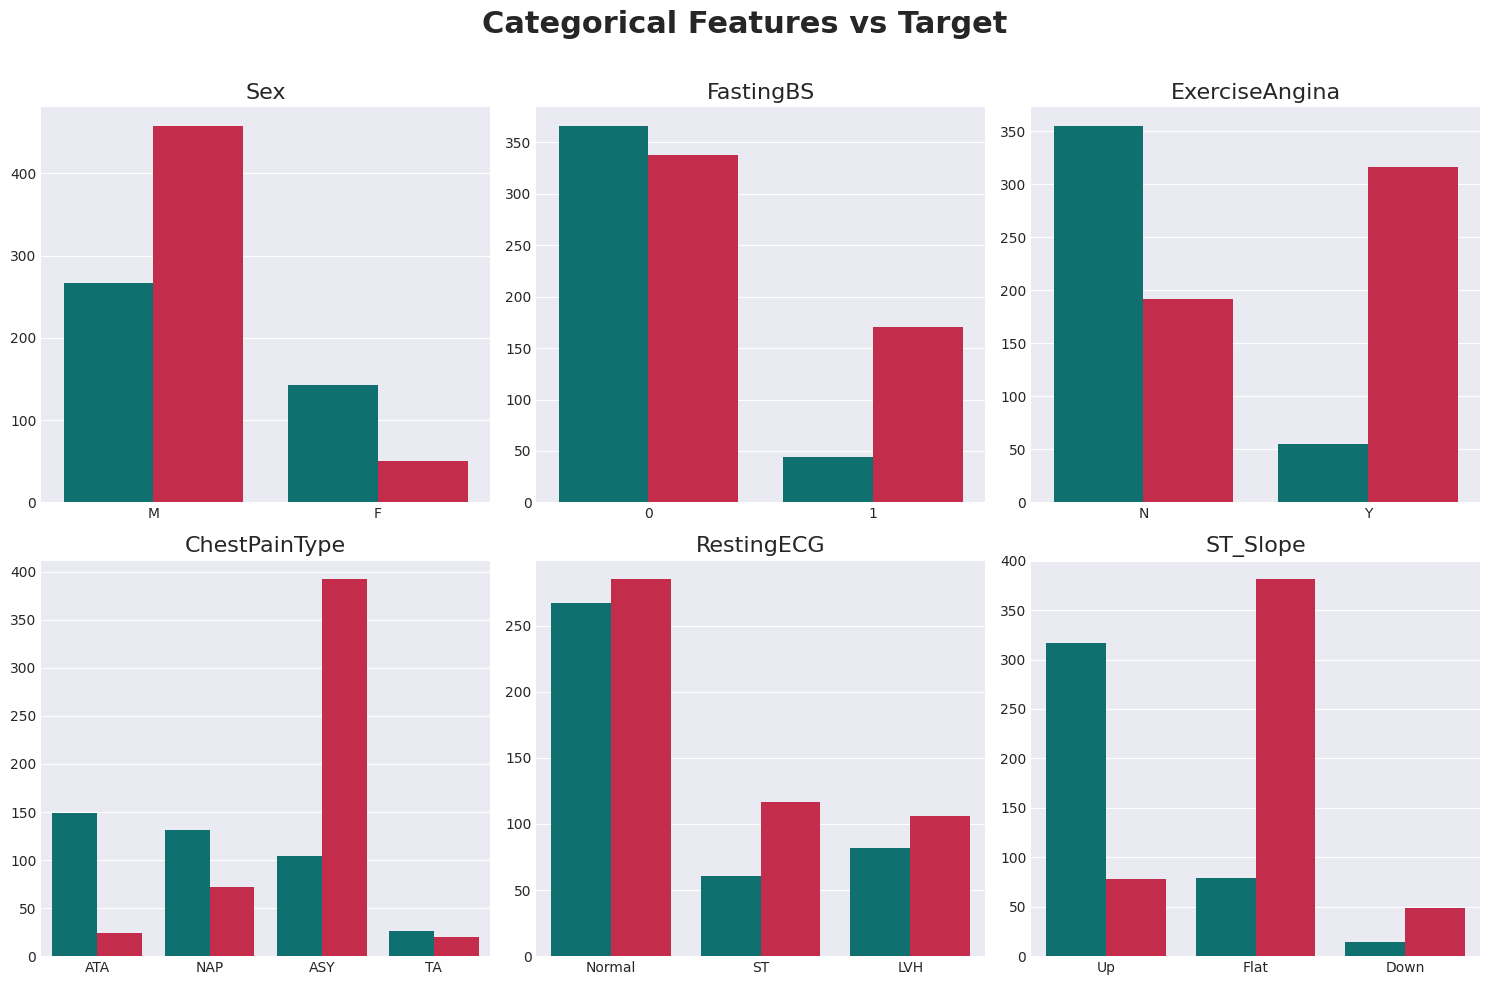

In [4]:
plot_features(features=cat_cols, title='Categorical Features vs Target', kind='count')

Based on our dataset, you have a high chance of having a heart disease if: 
- you are a male, sad short story :), 
- your fasting blood sugar levels above 120mg/dl, 
- you experience a chest pain during physical activity (especially Asymptomatic (ASY) and typical angina (TA) chest pain types)
- the ECG reading is LVH (left ventricular hypertrophy), and 
- your ST slope is going down or flat....... 

### Numerical features vs. Target

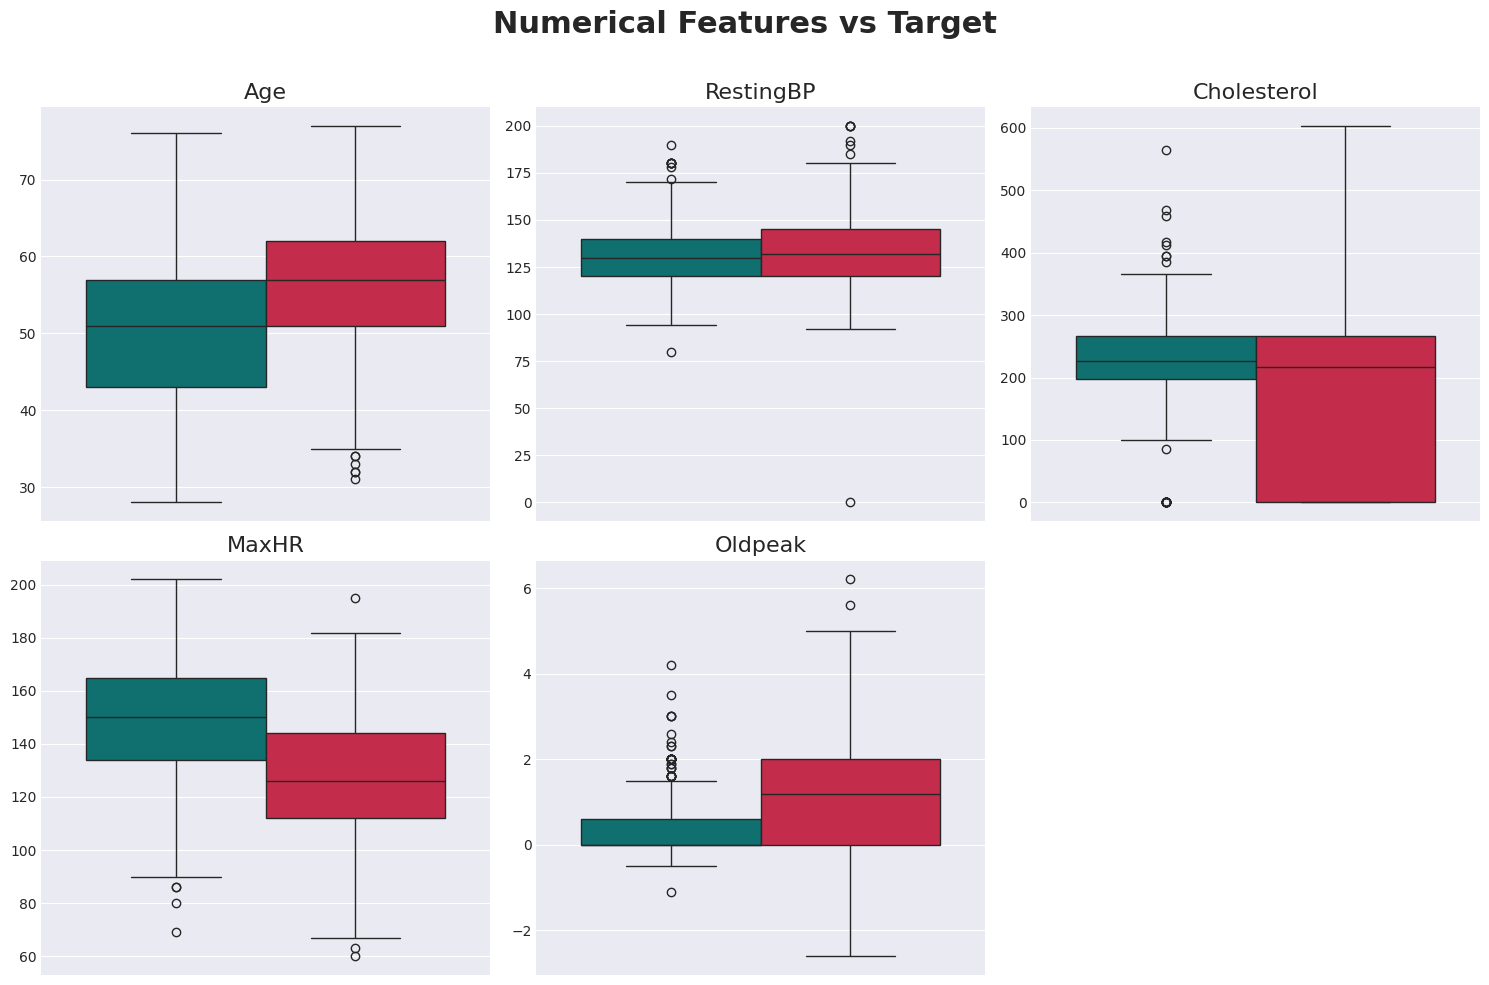

In [5]:
plot_features(features=num_cols, title='Numerical Features vs Target', kind='box')

The heart disease group (almost) has:
- older ages, 
- high blood pressure,  
- lower maximum heart rate, and
- higher old peak values.

### Numerical features distribution

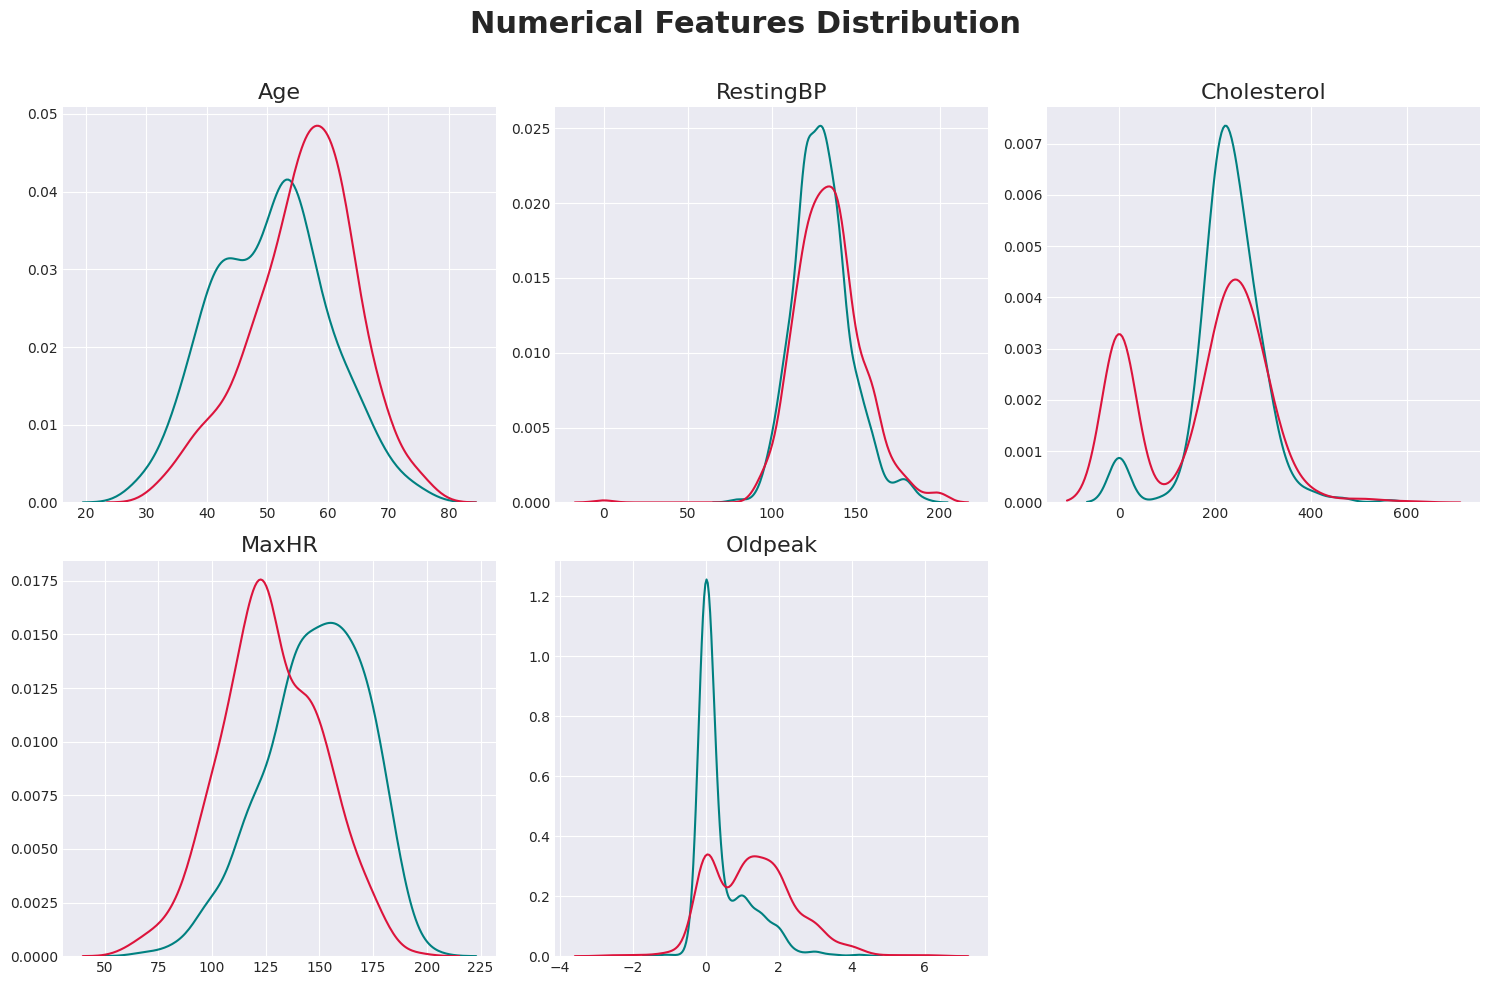

In [6]:
plot_features(features=num_cols, title='Numerical Features Distribution', kind='kde')

For Cholesterol and Oldpeak, there is a different distribution of values, indicating potential differences in heart stress responses and maybe I need to split these two features into more than one group of values (I will test this assumption later)

### Features correlation

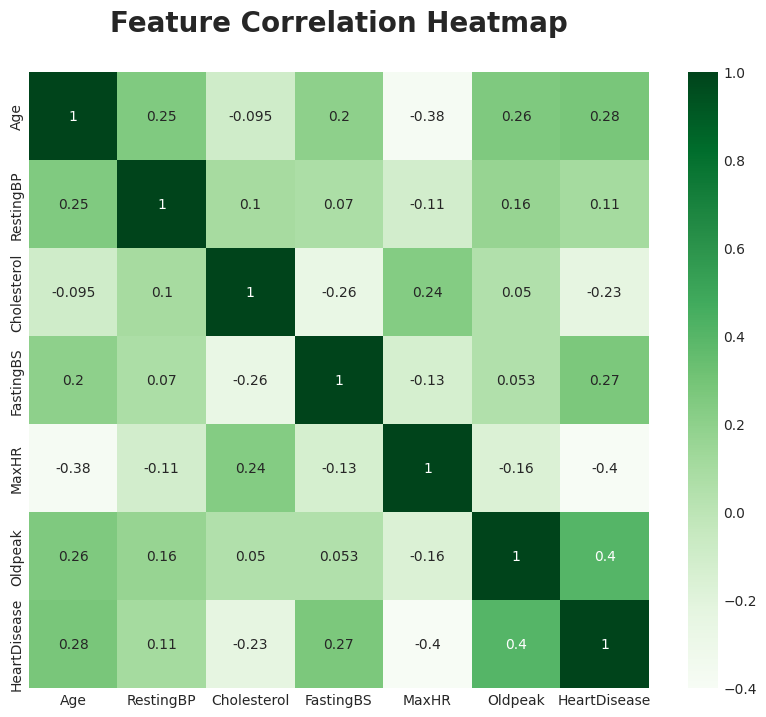

In [7]:
plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Feature Correlation Heatmap\n', fontsize=20, fontweight='bold')
plt.show()

MaxHR and Oldpeak show moderate negative and positive correlations with heart disease, respectively, suggesting these features are important predictors. However, the wide spread in cholesterol levels and the slight increase in resting blood pressure in the disease group indicate that these features may have a less direct impact on heart disease risk.